# Práctica profesional Vicente Marchant C.        

En este cuaderno de Jupyter se muestra cómo acceder las series de tiempo MT para guardarlas y exportarlas en .csv


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from resistics.project.io import loadProject
from resistics.project.time import viewTime

In [2]:
#Cargamos el proyecto
projectPath = "proyecto"
# load the project and print infomation
projData = loadProject(projectPath)
#projData.printInfo()

18:46:08 loadProject Info: Loading project file: proyecto\mtProj.prj
18:46:08 ProjectData: ####################
18:46:08 ProjectData: PROJECTDATA INFO BEGIN
18:46:08 ProjectData: ####################
18:46:08 ProjectData: Time data path = proyecto\timeData
18:46:08 ProjectData: Spectra data path = proyecto\specData
18:46:08 ProjectData: Statistics data path = proyecto\statData
18:46:08 ProjectData: Mask data path = proyecto\maskData
18:46:08 ProjectData: TransFunc data path = proyecto\transFuncData
18:46:08 ProjectData: Calibration data path = proyecto\calData
18:46:08 ProjectData: Images data path = proyecto\images
18:46:08 ProjectData: Reference time = 2021-02-20 19:56:40
18:46:08 ProjectData: Project start time = 2021-02-20 19:56:48.000000
18:46:08 ProjectData: Project stop time = 2021-02-20 20:06:39.999756
18:46:08 ProjectData: Project found 1 sites:
18:46:08 ProjectData: site1		start: 2021-02-20 19:56:48	end: 2021-02-20 20:06:39.999756
18:46:08 ProjectData: Sampling frequencies fo

In [3]:
# Obtenemos datos del sitio
siteData = projData.getSiteData("site1")
siteData

Site = site1
Time data path = proyecto\timeData\site1
Spectra data path = proyecto\specData\site1
Statistics data path = proyecto\statData\site1
TransFunc data path = proyecto\transFuncData\site1
Site start time = 2021-02-20 19:56:48
Site stop time = 2021-02-20 20:06:39.999756
Sampling frequencies recorded = 4096.00000000, 16384.00000000
Number of measurement files = 2
Measurement		Sample Frequency (Hz)		Start Time		End Time
meas_2021-02-20_19-56-48		16384.0		2021-02-20 19:56:48		2021-02-20 19:58:47.999939
meas_2021-02-20_20-00-00		4096.0		2021-02-20 20:00:00		2021-02-20 20:06:39.999756

18:46:13 plotOptionsStandard::utilsCheck::parseKeywords: {'figsize': (20, 12), 'plotfonts': {'suptitle': 14, 'title': 12, 'axisLabel': 12, 'axisTicks': 12, 'legend': 12}, 'block': True}
18:46:13 plotOptionsTime::utilsCheck::parseKeywords: {'figsize': (20, 12), 'plotfonts': {'suptitle': 14, 'title': 12, 'axisLabel': 12, 'axisTicks': 12, 'legend': 12}, 'block': True, 'Eylim': [], 'Hylim': []}
18:46:13 viewTime::utilsCheck::parseKeywords: {'sites': ['site1'], 'sampleFreqs': [4096.0, 16384.0], 'chans': ['Ex', 'Ey', 'Hx', 'Hy', 'Hz'], 'polreverse': False, 'scale': False, 'calibrate': False, 'normalise': False, 'filter': {}, 'notch': [], 'show': False, 'save': False, 'plotoptions': {'figsize': (20, 12), 'plotfonts': {'suptitle': 14, 'title': 12, 'axisLabel': 12, 'axisTicks': 12, 'legend': 12}, 'block': True, 'Eylim': [], 'Hylim': []}}
18:46:13 SiteData: ####################
18:46:13 SiteData: SITEDATA INFO BEGIN
18:46:13 SiteData: ####################
18:46:13 SiteData: Site = site1
18:46:13

C:\Users\vicen\anaconda3\lib\site-packages\resistics\project\time.py:372: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(numChans, 1, idx + 1)


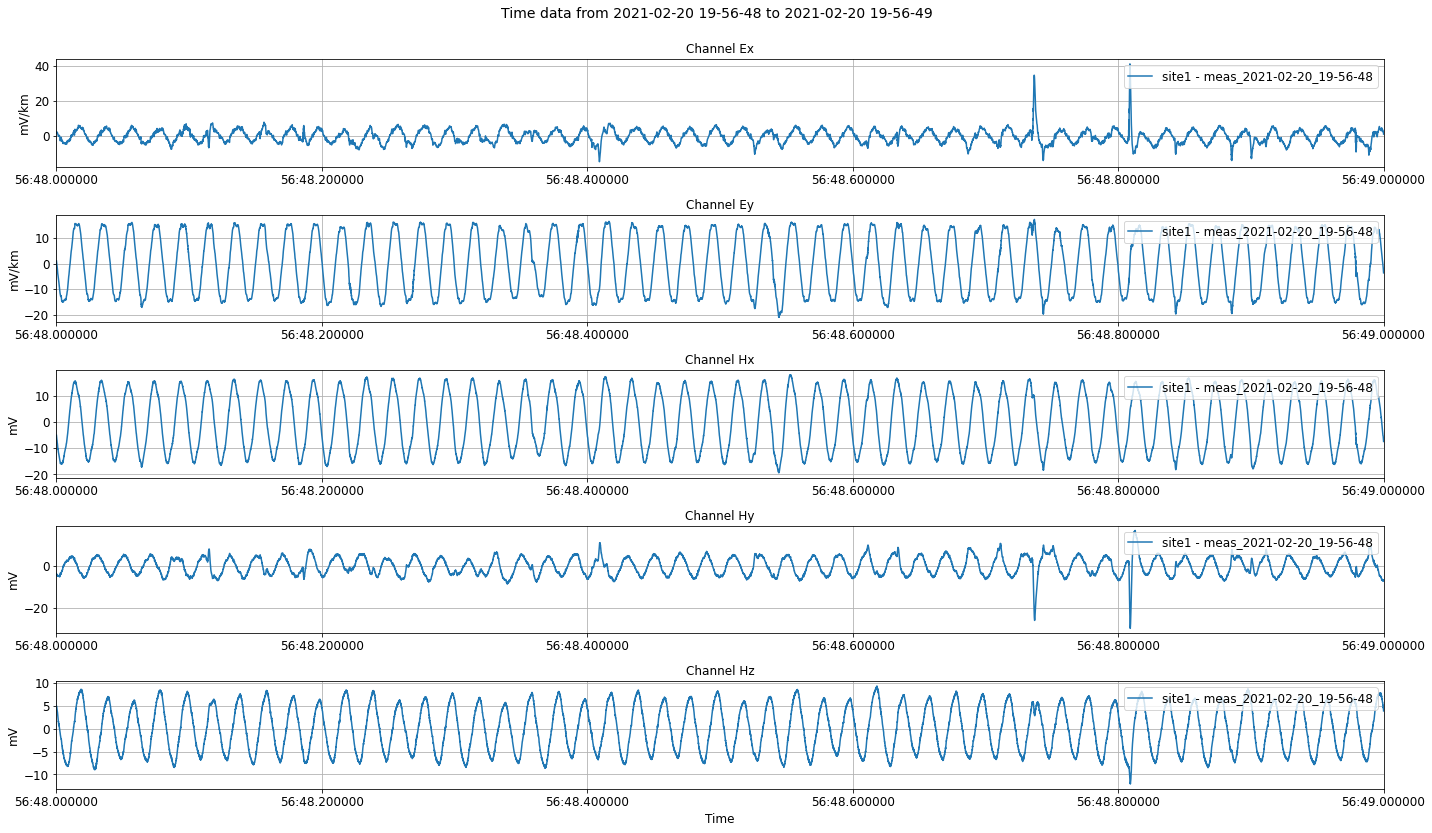

In [4]:
#Podemos visualizar las series de tiempo de las mediciones

fig = viewTime(
    projData,
    "2021-02-20 19:56:48",
    "2021-02-20 19:56:49",
    sites=["site1"],
    show=False,
    save=False)

## Objetivo 1: Acceder a la series de tiempo para trabajarlas

In [5]:
#Elegimos un tiempo de muestreo, necesario para formar diccionario con los datos
start, stop = "2021-02-20 19:56:48", "2021-02-20 20:05:48"

#Para el sitio, identificamos las medidas (measurements)
timeDataAll = {} #creamos diccionario vacío
for site in projData.sites:
    siteData = projData.getSiteData(site)
    siteData.printInfo()
    measurements = siteData.getMeasurements()
    timeDataAll[site] = {}

18:46:20 SiteData: ####################
18:46:20 SiteData: SITEDATA INFO BEGIN
18:46:20 SiteData: ####################
18:46:20 SiteData: Site = site1
18:46:20 SiteData: Time data path = proyecto\timeData\site1
18:46:20 SiteData: Spectra data path = proyecto\specData\site1
18:46:20 SiteData: Statistics data path = proyecto\statData\site1
18:46:20 SiteData: TransFunc data path = proyecto\transFuncData\site1
18:46:20 SiteData: Site start time = 2021-02-20 19:56:48
18:46:20 SiteData: Site stop time = 2021-02-20 20:06:39.999756
18:46:20 SiteData: Sampling frequencies recorded = 4096.00000000, 16384.00000000
18:46:20 SiteData: Number of measurement files = 2
18:46:20 SiteData: Measurement		Sample Frequency (Hz)		Start Time		End Time
18:46:20 SiteData: meas_2021-02-20_19-56-48		16384.0		2021-02-20 19:56:48		2021-02-20 19:58:47.999939
18:46:20 SiteData: meas_2021-02-20_20-00-00		4096.0		2021-02-20 20:00:00		2021-02-20 20:06:39.999756
18:46:20 SiteData: ####################
18:46:20 SiteData: 

In [6]:
measurements

['meas_2021-02-20_19-56-48', 'meas_2021-02-20_20-00-00']

In [7]:
#Rellenamos diccionario TimeDataAll con datos de las mediciones

for meas in measurements:
    sampleFreq = siteData.getMeasurementSampleFreq(meas)
    reader = siteData.getMeasurement(meas)
    sampleStart, sampleStop = reader.time2sample(start, stop)
    readStart, readStop = reader.sample2time(sampleStart, sampleStop)
    timeData = reader.getPhysicalData(readStart, readStop)
    timeDataAll[site][meas] = timeData
    

18:46:21 TimeReaderATS Info: Date 2021-02-20 20:05:48 after end of recording. Stop date adjusted to 2021-02-20 19:58:47.999939
18:46:21 TimeReaderATS Info: Date 2021-02-20 19:56:48 before start of recording. Start date adjusted to 2021-02-20 20:00:00


In [8]:
timeDataAll[site][measurements[0]].chans

['Ex', 'Ey', 'Hx', 'Hy', 'Hz']

In [9]:
timeDataAll

{'site1': {'meas_2021-02-20_19-56-48': Sampling frequency [Hz] = 16384.0
  Sample rate [s] = 6.103515625e-05
  Number of samples = 1966080
  Number of channels = 5
  Channels = ['Ex', 'Ey', 'Hx', 'Hy', 'Hz']
  Start time = 2021-02-20 19:56:48
  Stop time = 2021-02-20 19:58:47.999939
  Comments
  	Unscaled data 2021-02-20 19:56:48 to 2021-02-20 19:58:47.999939 read in from measurement proyecto\timeData\site1\meas_2021-02-20_19-56-48, samples 0 to 1966079
  	Sampling frequency 16384.0
  	Scaling channel Ex with scalar -2.97425e-07 to give mV
  	Dividing channel Ex by electrode distance 0.014 km to give mV/km
  	Scaling channel Ey with scalar -7.4400625e-08 to give mV
  	Dividing channel Ey by electrode distance 0.014 km to give mV/km
  	Scaling channel Hx with scalar -1.19038e-06 to give mV
  	Scaling channel Hy with scalar -9.51232e-06 to give mV
  	Scaling channel Hz with scalar -5.94215e-07 to give mV
  	Remove zeros: False, remove nans: False, remove average: True,
  'meas_2021-02-20

In [10]:
# Teniendo el diccionario timeDataAll, podemos fijar parametros y acceder a las series de tiempo

In [11]:
site = 'site1'
meas1 = 'meas_2021-02-20_19-56-48'
meas2 = 'meas_2021-02-20_20-00-00'

In [12]:
timeDataAll[site][meas2]

Sampling frequency [Hz] = 4096.0
Sample rate [s] = 0.000244140625
Number of samples = 1425409
Number of channels = 5
Channels = ['Ex', 'Ey', 'Hx', 'Hy', 'Hz']
Start time = 2021-02-20 20:00:00
Stop time = 2021-02-20 20:05:48
Comments
	Unscaled data 2021-02-20 20:00:00 to 2021-02-20 20:05:48 read in from measurement proyecto\timeData\site1\meas_2021-02-20_20-00-00, samples 0 to 1425408
	Sampling frequency 4096.0
	Scaling channel Ex with scalar -1.492125e-07 to give mV
	Dividing channel Ex by electrode distance 0.014 km to give mV/km
	Scaling channel Ey with scalar -3.7328125e-08 to give mV
	Dividing channel Ey by electrode distance 0.014 km to give mV/km
	Scaling channel Hx with scalar -5.97185e-07 to give mV
	Scaling channel Hy with scalar -4.777472e-06 to give mV
	Scaling channel Hz with scalar -2.98265e-07 to give mV
	Remove zeros: False, remove nans: False, remove average: True

## Con las líneas siguientes se pueden obtener parámetros de la medición de ser necesario.

In [41]:
# ¿Cómo llegamos a time.reader_ats?

siteData.readers["meas_2021-02-20_20-00-00"].getSensors(chans=["Ex","Ey","Hx","Hy","Hz"])

{'Ex': 'EFP06', 'Ey': 'EFP06', 'Hx': 'MFS07e', 'Hy': 'MFS07e', 'Hz': 'MFS07e'}

In [42]:
siteData.readers["meas_2021-02-20_20-00-00"].headers

{'start_time': '20:00:00.000000',
 'start_date': '2021-02-20',
 'stop_time': '20:06:39.999756',
 'stop_date': '2021-02-20',
 'meas_channels': 5,
 'sample_freq': 4096.0,
 'num_samples': 1638400}

In [49]:
# Datos para canal Ex
siteData.readers["meas_2021-02-20_20-00-00"].chanHeaders[0]

{'gain_stage1': 4,
 'gain_stage2': 1,
 'hchopper': 0,
 'echopper': 0,
 'start_time': '20:00:00.000000',
 'start_date': '2021-02-20',
 'sample_freq': 4096.0,
 'num_samples': 1638400,
 'ats_data_file': '071_V01_C00_R005_TEx_BL_4096H.ats',
 'sensor_type': 'EFP06',
 'channel_type': 'Ex',
 'ts_lsb': -1.492125e-07,
 'pos_x1': -7.0,
 'pos_x2': 7.0,
 'pos_y1': 0.0,
 'pos_y2': 0.0,
 'pos_z1': 0.0,
 'pos_z2': 0.0,
 'sensor_sernum': 0,
 'scaling_applied': False,
 'stop_date': '2021-02-20',
 'stop_time': '20:06:39.999756'}

In [50]:
siteData.readers["meas_2021-02-20_20-00-00"].chanHeaders[1]

{'gain_stage1': 16,
 'gain_stage2': 1,
 'hchopper': 0,
 'echopper': 0,
 'start_time': '20:00:00.000000',
 'start_date': '2021-02-20',
 'sample_freq': 4096.0,
 'num_samples': 1638400,
 'ats_data_file': '071_V01_C01_R005_TEy_BL_4096H.ats',
 'sensor_type': 'EFP06',
 'channel_type': 'Ey',
 'ts_lsb': -3.7328125e-08,
 'pos_x1': 0.0,
 'pos_x2': 0.0,
 'pos_y1': -7.0,
 'pos_y2': 7.0,
 'pos_z1': 0.0,
 'pos_z2': 0.0,
 'sensor_sernum': 0,
 'scaling_applied': False,
 'stop_date': '2021-02-20',
 'stop_time': '20:06:39.999756'}

# Cargamos las series en un Data Frame para exportar

In [15]:
import pandas as pd
df_meas1 = pd.DataFrame()
df_meas2 = pd.DataFrame()

In [16]:
#Esta serie corresponde a frecuencia de muestreo 16384Hz
for chan in ['Ex', 'Ey', 'Hx', 'Hy', 'Hz']:
    df_meas1[chan] = timeDataAll[site][meas1].data[chan]
df_meas1    

,Ex,Ey,Hx,Hy,Hz
0,1.302687,-6.043739,-5.068050,-3.625506,4.867658
1,1.595800,-6.301016,-5.481666,-3.666238,4.929900
2,1.896666,-6.632131,-5.795542,-4.010289,4.935617
3,1.857088,-6.763283,-5.938743,-4.366935,4.780284
4,1.761551,-6.988871,-6.306825,-4.444726,4.608003
...,...,...,...,...,...
1966075,-6.154777,-1.227297,-7.178118,4.863126,-7.160608
1966076,-5.733857,-1.113921,-7.019682,4.748741,-7.368105
1966077,-5.537833,-0.691719,-6.692888,4.864096,-7.360181
1966078,-5.513996,-0.157804,-6.068161,4.823384,-7.367517


In [27]:
df_meas1.to_csv("series_16384.csv")

In [28]:
#Esta serie corresponde a frecuencia de muestreo 4096Hz
for chan in ['Ex', 'Ey', 'Hx', 'Hy', 'Hz']:
    df_meas2[chan] = timeDataAll[site][meas2].data[chan]
df_meas2    

,Ex,Ey,Hx,Hy,Hz
0,-0.766628,-22.269126,-6.596703,-6.888733,5.413418
1,-1.659217,-23.723264,-7.809276,-6.690612,5.080673
2,-2.364438,-25.734935,-9.204471,-6.634476,4.388624
3,-3.415129,-26.573762,-10.306972,-6.489299,3.499716
4,-3.564469,-27.673172,-11.177512,-6.450687,3.098244
...,...,...,...,...,...
1425404,15.033718,23.562186,1.783403,-6.407709,6.848968
1425405,14.134691,22.528720,0.485420,-6.105925,6.706664
1425406,14.570818,21.438712,-0.484412,-6.291291,6.524275
1425407,14.797834,20.445848,-1.406352,-6.572723,6.245308


In [29]:
df_meas2.to_csv("series_4096.csv")

## Graficamos la primera muestra correspondiente a una frecuencia de 16384Hz

Graficaremos primeros 5000 datos

In [17]:
data_1 = timeDataAll[site][meas1].data
data_1

{'Ex': array([ 1.3026875 ,  1.59579984,  1.89666647, ..., -5.53783256,
        -5.51399608, -5.28553119]),
 'Ey': array([-6.04373863, -6.30101599, -6.63213065, ..., -0.69171904,
        -0.15780421,  0.03696068]),
 'Hx': array([-5.0680503 , -5.48166569, -5.79554152, ..., -6.69288805,
        -6.06816115, -5.74635978]),
 'Hy': array([-3.62550645, -3.6662382 , -4.01028931, ...,  4.86409647,
         4.82338374,  4.62422429]),
 'Hz': array([ 4.8676576 ,  4.92990044,  4.93561738, ..., -7.36018126,
        -7.36751685, -7.50207862])}

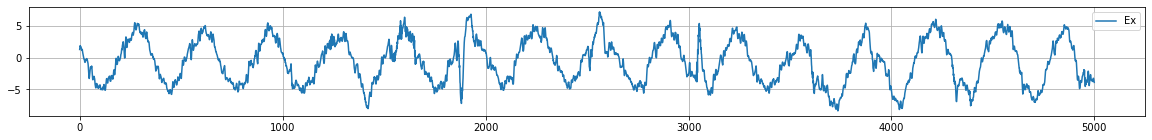

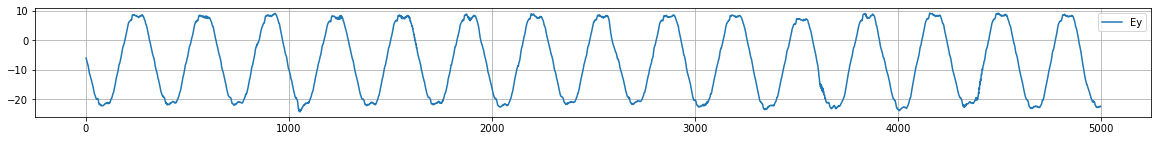

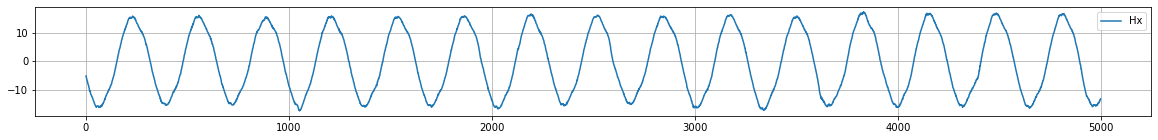

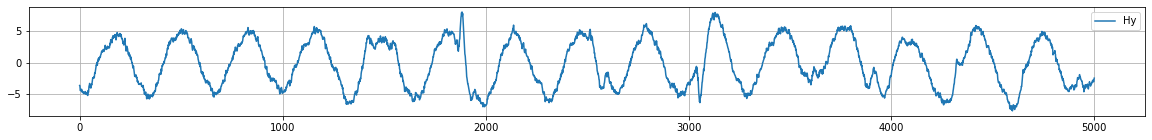

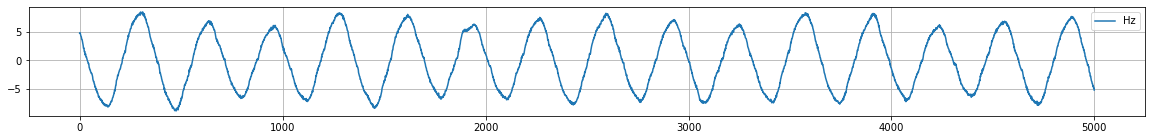

In [18]:
for i in data_1.keys():
    plt.figure(figsize=(20,2))
    plt.grid()
    plt.plot(data_1[i][:5000], label=i)
    plt.legend()   

## Ahora graficamos para la segunda medida correspondiente a 4096Hz

Graficaremos los primeros 5000 datos

In [19]:
data_2 = timeDataAll[site][meas2].data
data_2

{'Ex': array([-0.76662808, -1.65921725, -2.36443816, ..., 14.57081822,
        14.79783438, 13.79416716]),
 'Ey': array([-22.26912564, -23.72326408, -25.73493539, ...,  21.43871188,
         20.44584774,  19.29287262]),
 'Hx': array([-6.59670311, -7.8092765 , -9.20447145, ..., -0.48441192,
        -1.40635209, -2.64948344]),
 'Hy': array([-6.88873339, -6.69061163, -6.63447633, ..., -6.29129141,
        -6.57272273, -6.29453053]),
 'Hz': array([5.41341757, 5.08067254, 4.38862407, ..., 6.52427514, 6.24530848,
        5.81779273])}

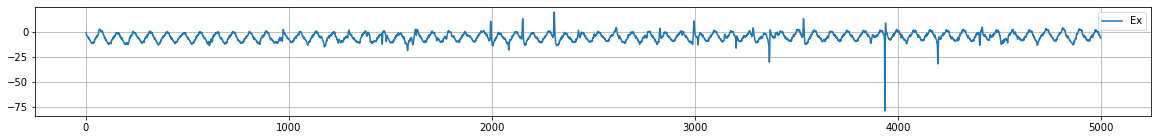

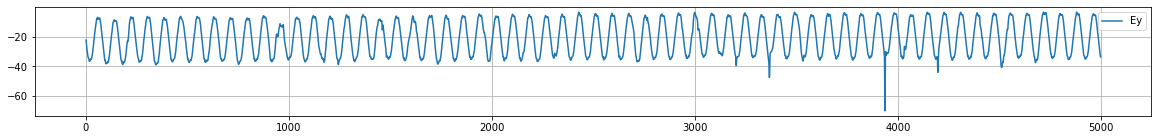

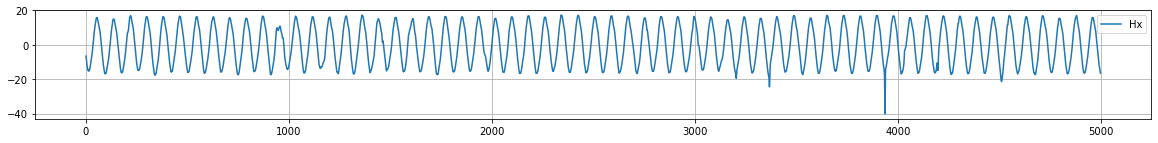

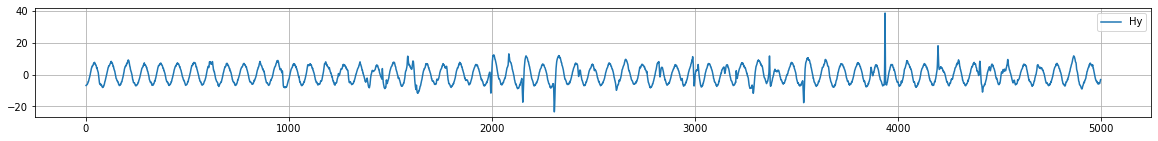

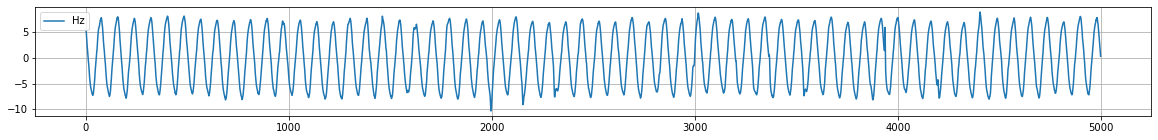

In [20]:
for i in data_2.keys():
    plt.figure(figsize=(20,2))
    plt.grid()
    plt.plot(data_2[i][:5000], label=i)
    plt.legend()
    

# De aquí en adelante se muestran los intentos de desarrollar el método de Clustering (dejado en pausa) viendo cómo actúan las funciones de Resistics. 

# Objetivo 3: Ver como funcionan internamente las funciones de Resistics

La función calculateSpectra se aplica al proyecto entero, calculando el espectro para cada medición y frecuencia que exista.

- Se hace ciclo for para cada frecuencia existente
- Tal como para definir las series de tiempo anteriormente, se define un archivo del tipo TimeData, para leer los datos (getPhysicalData)
- Se aplican varias opciones de calibración
- Se definen parámetros de decimación y windowing, mediante getDecimationParameters y getWindowParameters
- Se hace la decimación en n niveles y m frecuencias por nivel mediante función Decimator
- Se hace un ciclo for por todos las frecuencias de cada nivel de decimacion y se obtienen Los datos (dec.TimeData), se crea windower y finalmente de colectan los datos time data en timeDataList
- Se crea una carpeta para guardar el espectro y se crea un "escritor de espectro" SpectrumWriter
- Se calcula el espectro para cada ventana mediante ´calculateWindowSpectra´ 
- Se escribe cada espectro en la carpeta creada anteriormente.

## Nos adentramos en la función calculateSpectra

In [24]:
from resistics.spectra.io import SpectrumWriter
from resistics.decimate.decimator import Decimator
from resistics.window.windower import Windower
from resistics.project.shortcuts import (
        getCalibrator,
        getDecimationParameters,
        getWindowParameters,
    )
from resistics.project.preprocess import (
        applyPolarisationReversalOptions,
        applyScaleOptions,
        applyCalibrationOptions,
        applyFilterOptions,
        applyNotchOptions,
    )

datetimeRef = projData.refTime
site = "site1"
sampleFreq = projData.getSampleFreqs()[0] #4096 Hz
measurement = siteData.getMeasurements(sampleFreq) # meas_2021-02-20_20-00-00

reader = siteData.getMeasurement(meas)
startTime = siteData.getMeasurementStart(meas)
stopTime = siteData.getMeasurementEnd(meas)
dataChans = reader.getChannels() # ['Ex', 'Ey', 'Hx', 'Hy', 'Hz']

timeData = reader.getPhysicalData(startTime, stopTime, chans=dataChans)
decParams = getDecimationParameters(sampleFreq, projData.config)
numLevels = decParams.numLevels
winParams = getWindowParameters(decParams, projData.config)
dec = Decimator(timeData, decParams)

# loop through decimation levels
for declevel in range(0, numLevels):
    # get the data for the current level
    check = dec.incrementLevel()
    if not check:
         break  # not enough data
    timeData = dec.timeData
    # create the windower and give it window parameters for current level
    sampleFreqDec = dec.sampleFreq
    win = Windower(
                        datetimeRef,
                        timeData,
                        winParams.getWindowSize(declevel),
                        winParams.getOverlap(declevel),
                    )
    if win.numWindows < 2:
        break  # do no more decimation
    
    # collect time data
    timeDataList = []
    for iW in range(0, win.numWindows):
        timeDataList.append(win.getData(iW))
        
        
        
    specDataList = calculateWindowSpectra(
                            timeDataList,
                            sampleFreqDec,
                            winParams.getWindowSize(declevel),
                            projData.config.configParams )

13:29:27 Decimator Info: Downsample factor of 16 greater than max decimation factor 8.
13:29:27 Decimator Info: Downsampling in multiple decimations given by factors: 8, 2
13:29:27 WINDOWER WARNING: Number of windows in data is small - consider stopping decimation
13:29:27 WINDOWER WARNING: Number of windows in data is small - consider stopping decimation


In [47]:
decParams

Sampling frequency = 4096.000000
Number of decimation levels = 7
Level = 0	sample freq. [Hz] = 4096.000000	sample rate [s] = 0.000244	dec. factor = 0000001	inc. factor = 1
Level = 1	sample freq. [Hz] = 512.000000	sample rate [s] = 0.001953	dec. factor = 0000008	inc. factor = 8
Level = 2	sample freq. [Hz] = 64.000000	sample rate [s] = 0.015625	dec. factor = 0000064	inc. factor = 8
Level = 3	sample freq. [Hz] = 4.000000	sample rate [s] = 0.250000	dec. factor = 0001024	inc. factor = 16
Level = 4	sample freq. [Hz] = 0.500000	sample rate [s] = 2.000000	dec. factor = 0008192	inc. factor = 8
Level = 5	sample freq. [Hz] = 0.031250	sample rate [s] = 32.000000	dec. factor = 0131072	inc. factor = 16
Level = 6	sample freq. [Hz] = 0.003906	sample rate [s] = 256.000000	dec. factor = 1048576	inc. factor = 8
Evaluation frequencies [Hz]
Level = 0: 1024.00000000, 724.07734394, 512.00000000, 362.03867197, 256.00000000, 181.01933598, 128.00000000
Level = 1: 90.50966799, 64.00000000, 45.25483400, 32.000000

## Objetivo 4: Seguimos tutorial de resistics aplicado a projData, para luego comparar con los datos filtrados por SSA

In [21]:
from resistics.project.io import loadProject

# calculate spectrum using standard options
from resistics.project.spectra import calculateSpectra
calculateSpectra(projData)
projData.refresh()

18:48:05 calculateSpectra::utilsCheck::parseKeywords: {'sites': ['site1'], 'sampleFreqs': [4096.0, 16384.0], 'chans': [], 'polreverse': False, 'scale': False, 'calibrate': True, 'notch': [], 'filter': {}, 'specdir': 'spectra', 'ncores': 0}
18:48:05 Calibrator: ####################
18:48:05 Calibrator: CALIBRATOR INFO BEGIN
18:48:05 Calibrator: ####################
18:48:05 Calibrator: Known extensions and calibration formats
18:48:05 Calibrator: Extensions:
18:48:05 Calibrator: TXT, TXT, RSP, RSPX
18:48:05 Calibrator: Associated formats
18:48:05 Calibrator: induction, metronix, rsp, rspx
18:48:05 Calibrator: 0 calibration files found:
18:48:05 Calibrator: 		No calibration files found
18:48:05 Calibrator: ####################
18:48:05 Calibrator: CALIBRATOR INFO END
18:48:05 Calibrator: ####################
18:48:05 SiteData: ####################
18:48:05 SiteData: SITEDATA INFO BEGIN
18:48:05 SiteData: ####################
18:48:05 SiteData: Site = site1
18:48:05 SiteData: Time data pa

Ahora se estima el tensor de impedancia mediante processProject()

In [22]:
# process the spectra
from resistics.project.transfunc import processProject

processProject(projData)

18:48:15 processProject::utilsCheck::parseKeywords: {'sites': ['site1'], 'sampleFreqs': [4096.0, 16384.0], 'specdir': 'spectra', 'inchans': ['Hx', 'Hy'], 'inputsite': '', 'outchans': ['Ex', 'Ey'], 'remotesite': '', 'remotechans': ['Hx', 'Hy'], 'crosschannels': [], 'masks': {}, 'datetimes': [], 'postpend': '', 'ncores': 0}
18:48:16 processSite::utilsCheck::parseKeywords: {'specdir': 'spectra', 'inchans': ['Hx', 'Hy'], 'inputsite': '', 'outchans': ['Ex', 'Ey'], 'remotesite': '', 'remotechans': ['Hx', 'Hy'], 'crosschannels': [], 'masks': {}, 'datetimes': [], 'postpend': '', 'ncores': 0}
18:48:16 processSite Info: Processing site site1, sampling frequency 4096.0
18:48:16 DecimationParameters: ####################
18:48:16 DecimationParameters: DECIMATIONPARAMETERS INFO BEGIN
18:48:16 DecimationParameters: ####################
18:48:16 DecimationParameters: Sampling frequency = 4096.000000
18:48:16 DecimationParameters: Number of decimation levels = 7
18:48:16 DecimationParameters: Level = 

18:49:54 plotOptionsStandard::utilsCheck::parseKeywords: {'figsize': (20, 12), 'plotfonts': {'suptitle': 14, 'title': 12, 'axisLabel': 12, 'axisTicks': 12, 'legend': 12}, 'block': True}
18:49:54 plotOptionsTransferFunction::utilsCheck::parseKeywords: {'figsize': None, 'plotfonts': {'suptitle': 14, 'title': 12, 'axisLabel': 12, 'axisTicks': 12, 'legend': 12}, 'block': True, 'res_ylim': [0.01, 10000], 'phase_ylim': [-20, 90], 'xlim': [0.0001, 10000]}
18:49:54 viewImpedance::utilsCheck::parseKeywords: {'sites': ['site1'], 'sampleFreqs': [4096.0, 16384.0], 'polarisations': ['ExHx', 'ExHy', 'EyHx', 'EyHy'], 'specdir': 'spectra', 'postpend': '', 'oneplot': True, 'save': False, 'show': False, 'plotoptions': {'figsize': None, 'plotfonts': {'suptitle': 14, 'title': 12, 'axisLabel': 12, 'axisTicks': 12, 'legend': 12}, 'block': True, 'res_ylim': [0.01, 10000], 'phase_ylim': [-20, 90], 'xlim': [0.0001, 10000]}}
18:49:54 getTransferFunctionData::utilsCheck::parseKeywords: {'specdir': 'spectra', 'po

C:\Users\vicen\anaconda3\lib\site-packages\resistics\transfunc\data.py:280: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(nrows, ncols, idx + 1 - plotNumMult * idx)
C:\Users\vicen\anaconda3\lib\site-packages\resistics\transfunc\data.py:319: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot(nrows, ncols, ncols + idx + 1 - plotNumMult * idx)
C:\Users\vicen\anaconda3\lib\site-packages\resistics\trans

18:49:54 getTransferFunctionData Info: Reading transfer function for site site1, sample frequency 16384.0, file proyecto\transFuncData\site1\16384_000\site1_fs16384_000_spectra
18:49:54 TransferFunctionReader: ####################
18:49:54 TransferFunctionReader: TRANSFERFUNCTIONREADER INFO BEGIN
18:49:54 TransferFunctionReader: ####################
18:49:54 TransferFunctionReader: Headers in file
18:49:54 TransferFunctionReader: 	sampleFreq = 16384.0
18:49:54 TransferFunctionReader: 	insite = site1
18:49:54 TransferFunctionReader: 	inchans = Hx, Hy
18:49:54 TransferFunctionReader: 	outsite = site1
18:49:54 TransferFunctionReader: 	outchans = Ex, Ey
18:49:54 TransferFunctionReader: 	remotesite = False
18:49:54 TransferFunctionReader: 	remotechans = []
18:49:54 TransferFunctionReader: ####################
18:49:54 TransferFunctionReader: TRANSFERFUNCTIONREADER INFO END
18:49:54 TransferFunctionReader: ####################
18:49:54 viewImpedance Info: Plotting transfer function for site 

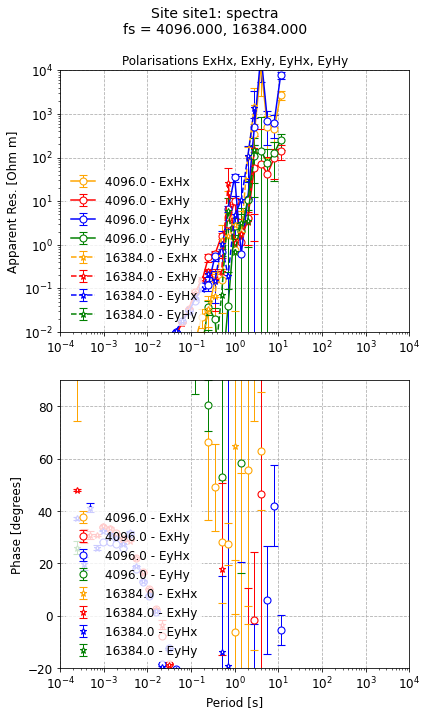

In [23]:
# plot transfer function and save the plot
from resistics.project.transfunc import viewImpedance

figs = viewImpedance(projData, sites=["site1"], show=False, save=False)
figs[0]

18:50:28 plotOptionsStandard::utilsCheck::parseKeywords: {'figsize': (20, 12), 'plotfonts': {'suptitle': 14, 'title': 12, 'axisLabel': 12, 'axisTicks': 12, 'legend': 12}, 'block': True}
18:50:28 plotOptionsTransferFunction::utilsCheck::parseKeywords: {'figsize': None, 'plotfonts': {'suptitle': 14, 'title': 12, 'axisLabel': 12, 'axisTicks': 12, 'legend': 12}, 'block': True, 'res_ylim': [0.01, 10000], 'phase_ylim': [-20, 90], 'xlim': [0.0001, 10000]}
18:50:28 viewImpedance::utilsCheck::parseKeywords: {'sites': ['site1'], 'sampleFreqs': [4096.0, 16384.0], 'polarisations': ['ExHx', 'ExHy', 'EyHx', 'EyHy'], 'specdir': 'spectra', 'postpend': '', 'oneplot': False, 'save': False, 'show': False, 'plotoptions': {'figsize': None, 'plotfonts': {'suptitle': 14, 'title': 12, 'axisLabel': 12, 'axisTicks': 12, 'legend': 12}, 'block': True, 'res_ylim': [0.01, 10000], 'phase_ylim': [-20, 90], 'xlim': [0.0001, 10000]}}
18:50:28 getTransferFunctionData::utilsCheck::parseKeywords: {'specdir': 'spectra', 'p

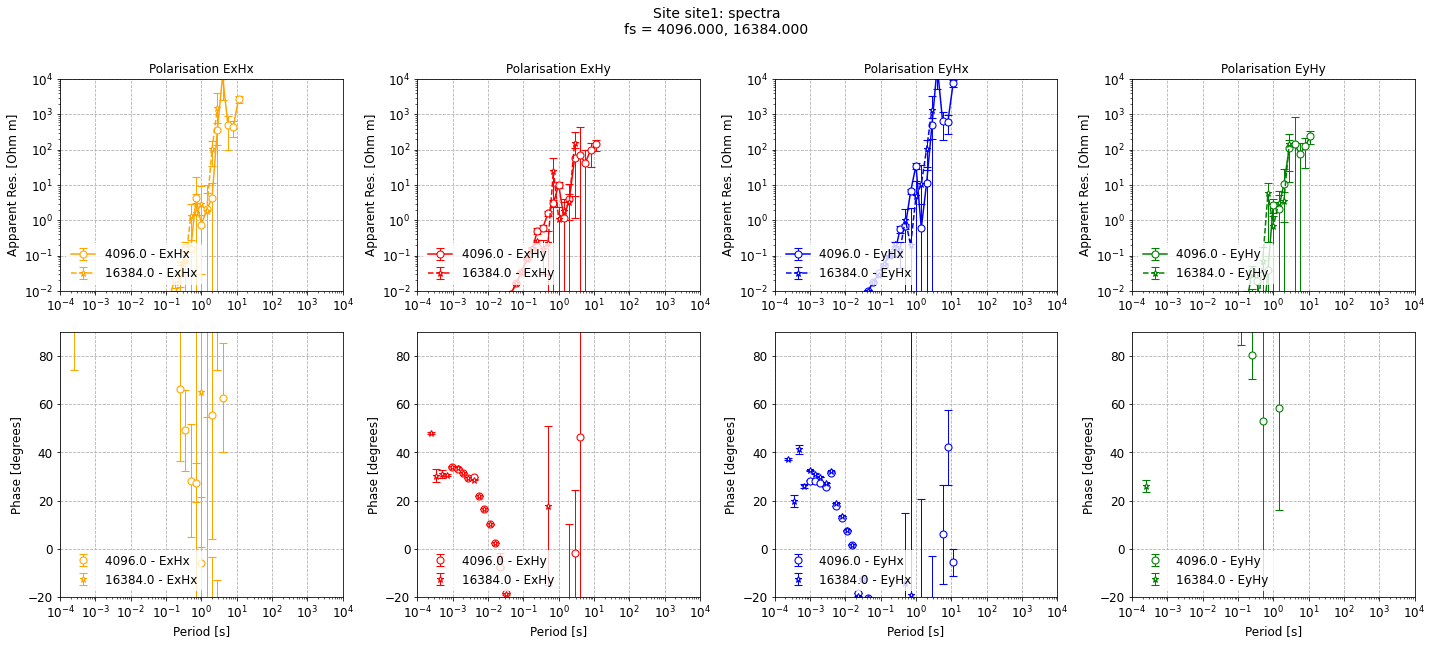

In [26]:
# this plot is quite busy, let's plot all the components on separate plots
figs = viewImpedance(projData, sites=["site1"], oneplot=False, save=False, show=False)
figs[0]